## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import io
import boto3
import json
from botocore.config import Config

## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']),pool_recycle=600)

In [4]:
try:
    ssm = boto3.client('ssm')
    s3 = boto3.client('s3')
    s3_resource = boto3.resource('s3')
except:
    aws_config = Config(region_name=config['DEFAULT']['AWS_DEFAULT_REGION'])    

    aws_session = boto3.session.Session(
        aws_access_key_id=config['DEFAULT']['AWS_ACCESS_KEY_ID'],
        aws_secret_access_key=config['DEFAULT']['AWS_SECRET_ACCESS_KEY']            
    )

    ssm = aws_session.client('ssm', config=aws_config)
    s3 = aws_session.client('s3', config=aws_config)
    s3_resource = aws_session.resource('s3')  

## Utilitaires

In [5]:
def export_df(df, name, date=True):
    df.to_csv('../output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [6]:
def export_fig(plot, name, date=True):
    plot.savefig('../images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

### Read Query

In [ ]:
df = pd.read_sql_query("""SELECT id FROM article_article WHERE published = '1' AND feed IN ('RTBFINFO','RTBFSPORT','RTBFTENDANCE','RTBFCULTURE', 'TV', 'MUSIQ3', 'CLASSIC21', 'TIPIK', 'VIVACITE', 'LAPREMIERE')  AND DATE_TRUNC('day', displaydate) = '{}'""", engine)
df.head()

### Read Excel

In [ ]:
df = pd.read_excel("""SELECT * FROM egos_actito LIMIT 1""", sheet_name='regsource', engine='openpyxl')
df.head()

### Read from S3

In [4]:
bucket = 'big-data-media'
data = s3.get_object(Bucket=bucket, Key='playground/actito/output/attribution_firstname.csv')
df = pd.read_csv(io.BytesIO(data['Body'].read()), encoding='utf-8-sig')

In [12]:
df.count()

actitoid                            3538392
firstname                           3538392
lastname                            3538392
email                               3538392
birthdate                           3538392
language                            3538392
gender                              3538392
gsmnumber                           3538392
telnumber                           3538392
educationlevel                      3538392
profession                          3538392
is_gigya                             977631
marketingconsent                          2
addr_street                         3538392
addr_num                            3538392
addr_box                            3538392
city                                3538392
zip                                 3538392
country                             3538392
is_active                           3538392
blacklistrm                         3538392
source                              3538392
sourceoptin                     

In [ ]:
df.shape

In [ ]:
df.isnull().any()

## Graphs

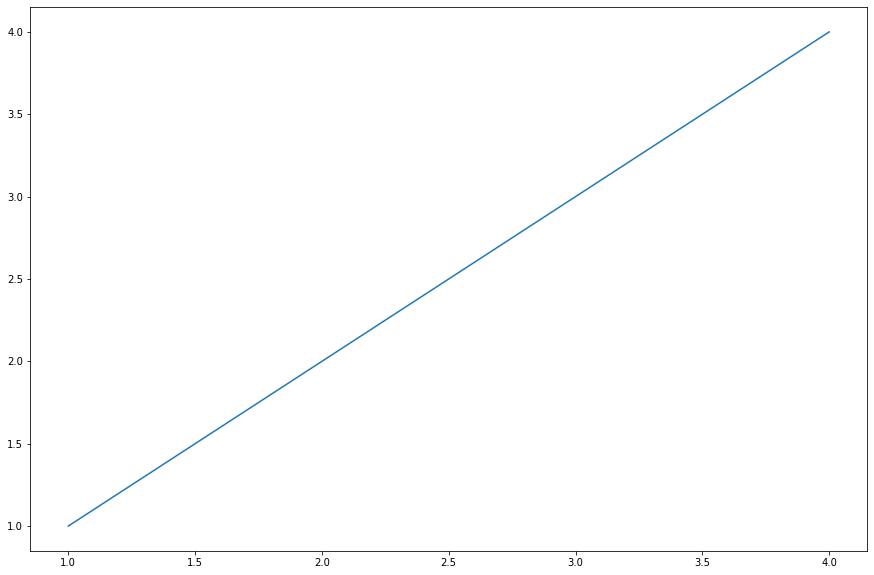

In [2]:
plt.figure(figsize = (15,10))
sns.lineplot(x=[1,2,3,4], y=[1,2,3,4])
plt.show()